# (1.) Word2Vec Model จาก Google

In [ ]:
import gensim
gensim.__version__

'4.3.2'

ไฟล์ Model ที่จะโหลด ผ่านการ Train โดย Google ซึ่งใช้คลังข้อความ(Corpus)ขนาดใหญ่ในการ Train ดังนั้น ไฟล์จึงมีขนาดใหญ่พอสมควร ประมาณ 1.7 GB

เรียกใช้ Model โดยสั่งให้ดาวน์โหลดไฟล์ Pre-trained อัตโนมัติดังนี้ (ไฟล์ขนาดใหญ่ ให้รอดาวน์โหลดสักครู่) หลังจากโหลดไฟล์เสร็จ จะทำการเรียกใช้ Model ได้เลย

In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


จะได้ตัวแปร model ซึ่งเป็น Model ที่พร้อมใช้ อันดับแรก ดูมิติเวกเตอร์ของ Model

In [ ]:
model.vector_size

300

มิติเวกเตอร์ของคำต่างๆ ก็จะมีขนาด 300 ด้วย ลองคำว่า dog หรือคำอื่นๆ

In [ ]:
model['dog'].shape    # ตรวจสอบมิติ Shape
# ได้เวกเตอร์ 1D มีขนาด 300

(300,)

In [ ]:
model['dog']    # ดูข้อมูลเวกเตอร์
# แสดงข้อมูลในเวคเตอร์คำว่า dog (เวกเตอร์ขนาด 300 จะมีค่าตัวเลข 300 ค่า)

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [ ]:
model['Thailand']    # ดูข้อมูลเวกเตอร์คำอื่น
# แสดงข้อมูลในเวคเตอร์ ขนาด 300 ข้อมูล

array([ 0.10986328, -0.1171875 ,  0.01000977,  0.23828125, -0.19335938,
        0.06030273,  0.05932617, -0.40234375, -0.13964844,  0.14453125,
        0.15917969, -0.17871094,  0.265625  , -0.28515625,  0.06884766,
       -0.21777344, -0.25976562,  0.14453125,  0.08056641, -0.07910156,
        0.20410156, -0.13183594,  0.01867676,  0.02355957,  0.11376953,
       -0.16015625, -0.21191406, -0.01251221,  0.05004883,  0.375     ,
       -0.24023438, -0.20800781, -0.07324219, -0.06054688,  0.06787109,
       -0.05053711, -0.41015625,  0.08251953,  0.20800781, -0.06884766,
       -0.10302734,  0.17578125,  0.0703125 ,  0.15332031, -0.02404785,
       -0.140625  , -0.17773438,  0.3125    ,  0.296875  ,  0.00662231,
       -0.17675781,  0.00241089, -0.109375  ,  0.15039062, -0.19726562,
        0.12890625, -0.20214844, -0.09863281,  0.08642578, -0.0039978 ,
       -0.14355469,  0.07275391,  0.01586914,  0.14160156,  0.06542969,
       -0.16113281,  0.16308594, -0.2265625 ,  0.18261719,  0.16

In [ ]:
len(model.index_to_key)   # จำนวนคำ มี 3 ล้านคำ

3000000

หมายถึงใน Model มีจำนวนคำมากถึง 3 ล้านคำ การที่มีจำนวนคำมากเนื่องจากไม่มีแค่คำศัพท์ปกติเท่านั้น แต่มีอักขระพิเศษ อักษรย่อ ชื่อเฉพาะ รวมอยู่ด้วย เช่น # U.S. Obama ... อย่างไรก็ตาม จะเห็นว่ามิติเวกเตอร์จะเล็กกว่าการใช้เทคนิคแบบเดิมๆ เช่น ถ้าใช้ One-hot หรือ TF-IDF เวกเตอร์ที่จะได้จะมีขนาดใหญ่มาก แต่วิธี Word2vec นี้ เวกเตอร์จะมีขนาด 300 เท่านั้น

ลองลิสคำใน Model 10 คำ (จากทั้งหมด 3 ล้านคำ)

In [ ]:
for index, word in enumerate(model.index_to_key):
  if index == 10:
    break
  print(index, word)

0 </s>
1 in
2 for
3 that
4 is
5 on
6 ##
7 The
8 with
9 said


กรณีค้นคำที่ไม่มีใน Model จะเกิด Error ให้ใช้ try ดักจบดังนี้

In [ ]:
try:
  vec = model['deep learn']
except KeyError:
  print('This word does not appear in this model')

This word does not appear in this model


ทดลองคำที่มีความหมายคล้ายกัน เช่น big กับ huge จะพบว่ามีค่าความคล้าย (Similarlity) ค่อนข้างสูง (ค่าดัชนีความคล้าย แสดงว่าสองคำนี้ มีความหมายที่คล้ายกันมาก)

In [ ]:
model.similarity('big', 'huge')

0.7809856

ถ้าเทียบระหว่าง big กับ small ค่าความคล้ายจะน้อย เช่น

In [ ]:
model.similarity('big','small')

0.49586785

หาคำที่มีความหมายคล้ายกันมากที่สุด (topn คือลิสจำนวนสูงสุดกี่คำ หากไม่กำหนด จะลิส 10 คำ) เช่น หาว่าคำคล้ายที่สุดกับคำว่า car จะได้ vehicle cars SUV ... มีความคล้ายกันมากที่สุดตามลำดับ

In [ ]:
model.most_similar('car', topn=8)

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512)]

เปรียบเทียบความคล้ายระหว่างคำจากตัวอย่างต่อไปนี้ จะพบว่า car กับ minivan มีความคล้ายกันมากกว่า car กับ apple

In [ ]:
pairs = [
    ('car', 'minivan'),    # car กับ minivan
    ('car', 'bicycle'),    # car กับ bicycle
    ('car', 'airplane'),
    ('car', 'apple'),
    ('car', 'man')]

for w1, w2 in pairs:
  print('%r\t%r\t%.2f' %(w1, w2, model.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'apple'	0.13
'car'	'man'	0.24


หาคำที่คล้ายระหว่างสองคำ เช่น car กับ minivan (รถที่มีลักษณะคุณสมบัติรถเก๋งผสมรถตู้) จะได้ SUV ฯลฯ

In [ ]:
model.most_similar(positive=['car','minivan'], topn=5)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346)]

หาคำที่ไม่เข้าพวก

In [ ]:
words = ['movie', 'song', 'book', 'music']
model.doesnt_match(words)

'book'

ลองคำนวณคำ king-man+woman (เป็นการคำนวณด้วยเวกเตอร์ของคำ) หนึ่งในผลลัพธ์ จะได้คำว่า queen อยู่ด้วย แสดงว่าในเวกเตอร์คำ มีความหมายอยู่ในตัว ทำให้ประมวลผลได้

In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.similar_by_vector(vec, topn=8)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438)]

ลองคำนวณคำ thai + food จะได้ผลลัพธ์ที่เป็นอาหารไทยในรายการ เช่น som_tam tom_yam ฯลฯ

In [ ]:
vec = model['thai'] + model['food']
model.similar_by_vector(vec, topn=8)

[('thai', 0.8111361861228943),
 ('food', 0.6910518407821655),
 ('som_tam', 0.5905162692070007),
 ('khao', 0.5869693756103516),
 ('chinese', 0.5779860019683838),
 ('tom_yam', 0.5763896703720093),
 ('dimsum', 0.5750942826271057),
 ('oyster_omelette', 0.5726006031036377)]

จะเห็นว่าค่าเวกเตอร์สื่อความหมายของคำด้วย อาจไม่ตรง 100% แต่ก็พอจะสื่อได้บ้าง โดยค่าที่ได้ก็จะขึ้นอยู่กับชุดข้อมูลคำ (Corpus) ที่นำมาใช้ Train แต่โดยรวมแล้วถือว่าเวกเตอร์มีความหมายพอสมควร และประเด็นหลักที่สำคัญอีกประการคือ ขนาดของเวกเตอร์แต่ละคำ มีขนาดเพียง 300 เท่านั้น

# (2.) ใช้งาน GloVe

ข้อนี้ใช้ Pre-trainedd Model คำศัพท์ของ Google ซึ่งไฟล์มีขนาดใหญ่มาก นอกจาก Word2Vec แล้วยังมี Pre-trained Model ที่ทำหน้าที่คล้ายกัน ของค่าย Stanford ชื่อ GloVe (Global Vectors for Word Representation) ซึ่งมี Model หลายขนาดให้เลือกใช้ ดังนี้ (เลขท้ายชื่อ Model คือขนาดเวกเตอร์ เช่น glove..100 มีขนาดเวกเตอร์ 100 ฯลฯ)

การเรียกใช้ ให้โหลดชื่อ Model เช่น

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-50')    # load model
model

[==================================================] 100.0% 199.5/199.5MB downloaded


หลักการใช้งานโดยรวมคล้ายที่กล่าวมาแล้ว เช่น ตรวจดูว่ามีคำศัพท์กี่คำ

In [ ]:
len(model.index_to_key)

1193514

ตรวจดูขนาดเวกเตอร์ (แต่ละคำมีเวกเตอร์เท่าใด)

In [ ]:
model.vector_size  # ตรวจดูขนาดขนาดเวกเตอร์

50

In [ ]:
model['dog']

array([-0.32538 , -0.32445 , -0.49074 , -0.70731 , -0.61267 , -0.53143 ,
        0.49369 ,  0.25313 , -0.19132 , -0.4573  , -0.38428 ,  0.97144 ,
       -4.2376  , -0.39954 ,  0.46864 ,  0.61591 ,  0.14492 , -1.2449  ,
        0.14534 , -0.5073  , -0.42109 ,  0.58748 ,  0.49906 , -0.20719 ,
        0.26784 ,  0.59813 , -0.59354 ,  0.45339 ,  0.49441 ,  0.08239 ,
       -0.44238 ,  0.26892 , -0.023738, -0.17423 , -0.74823 ,  0.18656 ,
        0.078524, -0.24285 , -0.19756 , -0.49863 , -1.0753  ,  0.18612 ,
       -0.87087 ,  0.44196 ,  0.815   ,  1.0486  ,  1.2306  ,  0.32016 ,
       -0.28743 , -0.10879 ], dtype=float32)

In [ ]:
for index, word in enumerate(model.index_to_key):
  if index == 10:
    break
  print(index, word)

0 <user>
1 .
2 :
3 rt
4 ,
5 <repeat>
6 <hashtag>
7 <number>
8 <url>
9 !


# (3.) Word Embedding ด้วย Keras

ข้อนี้จะทำ Word Embedding ด้วย Keras (แทนที่คำด้วยเวกเตอร์)  โดยชุดข้อมูล Dataset จะเป็นประโยคข้อความ Comment/FeedBack/Reviews ใดๆ (วิจารณ์หรือกล่าวถึงหนัง พูดถึงสถานที่ท่องเที่ยว) หรือเป็นเนื้อความในเอกสาร (แต่ละเอกสารมีหลายข้อความ หลายประโยค) หรือข้อความอะไรก็ได้

In [ ]:
from keras.preprocessing.text import Tokenizer

s1 = 'CNN is good.'   # ประโยคข้อความ (ยังไม่ต้องสนเรื่องหลักภาษา)
s2 = 'python is easy and good.'
s3 = 'So good so happy enjoy with Python.'

sentences = [s1, s2, s3]    # รวมเป็น 1 list
sentences

['CNN is good.',
 'python is easy and good.',
 'So good so happy enjoy with Python.']

แต่ละเอกสารหรือแต่ละประโยค นำมารวมกันให้เป็น List 1 ตัว เพื่อนำไปแบ่งเป็นคำๆ และทำการเข้ารหัส (Encode) ในลำดับต่อไป

## ตัดคำและเข้ารหัส

ใช้ตัวตัดคำใน Keras เริ่มสร้างอ็อบเจกต์ Tokenizer (tk) แล้วทำการ fit เพื่อตัดคำ เปลี่ยนเป็นอักษรเล็ก (Lower case) แล้วเข้ารหัสใส่เลขแทนคำแต่ละคำ (Encoding) เช่น ให้คำว่า is แทนด้ย 1, good แทนด้วยเลข 3 ,...

ในกรณีที่มีคำจำนวนมากๆ หากตัดคำแล้วนำมาใช้ทั้งหมดเลย อาจทำให้เมทริกซ์คำนวณคำมีขนาดใหญ่เกินไป เราสามารถำจัดขนาดได้โดย กำหนดค่า num_words ไม่ให้จำนวนคำเกินลิมิต เช่น num_words=10 ระบบจะนับและเข้ารหัสคำ หากพบว่ามีคำเกินกว่า num_words (มี word_index ที่ >= 10) ก็จะตัดเหลือเพียงแค่ num_words-1 คือเหลือแค่ 9 โดยเอาคำที่มีความถี่สูงสุดเก็บไว้ นอกนั้นตัดทิ้ง

In [ ]:
# tk = Tokenizer()    # แบบปกติ
tk = Tokenizer(num_words=16)    # กรณีคำมีขนาดใหญ่เกินไป
tk.fit_on_texts(sentences)    # fit tokenizer กับข้อมูลในเอกสารหรือประโยครวม

หลังจากการตัดคำแล้ว สามารถนำไปใช้งานกรณีต่างๆได้ เช่น เริ่มจาก การนับจำนวนเอกสาร หรือในที่นี้คือนับจำนวนประโยค จะได้ว่ามี 3 เอกสารหรือ 3 ประโยค

In [ ]:
tk.document_count   # จำนวน docs/sentences ได้ 3 ซึ่งก็คือ s1 s2 s3

3

แสดงคำ และ ค่าความถี่คำนั้นมีในเอกสารกี่เอกสารหรือกี่ประโยค (ตัวอย่างนี้ 1 เอกสารคือ 1 ประโยค) เช่น good มีอยู่ใน 3 เอกสาร, cnn มีปรากฏใน 1 เอกสาร, is มีปรากฏใน 2 เอกสาร, ...

โดยข้อมูลที่ได้เป็นดิกชันนารี สังเกตว่าคำจะถูกเปลี่ยนเป็นอักษรเล็กทั้งหมด (Default ของ Tokenizer คือเปลี่ยนเป็น Lowercase)

In [ ]:
tk.word_docs  # จำนวนคำไปปรากฏในกี่เอกสาร เช่น good มีอยู่ 3 เอกสาร

defaultdict(int,
            {'is': 2,
             'cnn': 1,
             'good': 3,
             'easy': 1,
             'python': 2,
             'and': 1,
             'with': 1,
             'so': 1,
             'enjoy': 1,
             'happy': 1})

แสดงจำนวนความถี่คำ โดยนับรวมทั้งหมดทุกเอกสาร เช่น เอกสารทั้งหมด มีคำว่า good 3 คำ, มีคำว่า is 2 คำ, มีคำว่า cnn 1 คำ โดยนับจากทุกเอกสารแล้ว (ข้อมูลเป็นดิกชันนารีเช่นกัน)

In [ ]:
tk.word_counts  # คำ และจำนวนความถี่ (นับรวมทั้งหมด)

OrderedDict([('cnn', 1),
             ('is', 2),
             ('good', 3),
             ('python', 2),
             ('easy', 1),
             ('and', 1),
             ('so', 2),
             ('happy', 1),
             ('enjoy', 1),
             ('with', 1)])

แสดงจำนวนความถี่คำ ใช้ .items() ก็ได้

In [ ]:
tk.word_counts.items()

odict_items([('cnn', 1), ('is', 2), ('good', 3), ('python', 2), ('easy', 1), ('and', 1), ('so', 2), ('happy', 1), ('enjoy', 1), ('with', 1)])

ค่า Index หรือเลขรหัสของคำ (รหัสตัวเลขแทนคำ จะไม่ซ้ำกัน) โดยตัวนี้มีความสำคัญมาก จะใช้เป็นข้อมูลในการประมวลผลต่อไป (รูปแบบดิกชันนารี)

In [ ]:
tk.word_index

{'good': 1,
 'is': 2,
 'python': 3,
 'so': 4,
 'cnn': 5,
 'easy': 6,
 'and': 7,
 'happy': 8,
 'enjoy': 9,
 'with': 10}

In [ ]:
tk.word_index['is']    # รหัสคำว่า is คือ 2

2

In [ ]:
tk.word_index['with']    # รหัสคำว่า with คือ 10

10

จากที่ผ่านมา เป็นเพียงการ fit ทำหน้าที่เข้ารหัส หรือหาค่ารหัสแต่ละคำมีค่ารหัสอะไร เช่น is = 2, python = 3, ... (รหัสเป็นคำๆ) แต่ในเอกสาร (ประโยค) ทั้งหมด ยังไม่มีการเข้ารหัส ดังนั้นลำดับต่อไป จะทำการเข้ารหัสทั้งเอกสาร ดังนี้

In [ ]:
sents_enc = tk.texts_to_sequences(sentences)
sents_enc     # sents=sentences, enc=encoded

[[5, 2, 1], [3, 2, 6, 7, 1], [4, 1, 4, 8, 9, 10, 3]]

เมื่อเข้ารหัสประโยคแล้ว จะเห็นว่า ข้อมูลแต่ละเอกสารจะถูกแทนที่ด้วค่ารหัส Index ของคำ เช่น 5 2 1 คือ cnn is good ทดลอง print เทียบกับเอกสารประโยคแรก (s1)

In [ ]:
print(s1)
tk.texts_to_sequences([s1])

CNN is good.


[[5, 2, 1]]

## การเติมให้ความยาวเท่ากัน (Padding)

ลองถอดรหัส (decode) เอกสารก่อนเข้ารหัส

In [ ]:
tk.sequences_to_texts(sents_enc)   # ถอดรหัส sents_enc (ก่อน Padding)

['cnn is good',
 'python is easy and good',
 'so good so happy enjoy with python']

ตามหลักแล้ว ข้อมูลอินพุตที่ป้อนให้กับ NN จะต้องมีขนาดมิติที่เท่าๆกัน (เช่น input_shape=xx ตามที่ได้สร้าง NN ไว้) ซึ่งถ้าพิจารณาอินพุตในตัวแปรของประโยค sent_enc ข้างต้น จะพบว่า แต่ละเอกสารจะมีความบาวไม่เท่ากัน ดังนั้น สิ่งที่ต้องทำคือการเติมค่าลงไป เพื่อทำใให้ความยาวของแต่ละรายการเท่ากัน เรียกว่า Paddimg โดยปกติจะใช้วิธีการเติมด้วยเลข 0 เนื่องจากเลข 0 ไม่ได้เป็นค่ารหัส index ของคำใดเลย (นี่เป็นเหตุผลหนึ่งที่การเข้ารหัสคำ ไม่ใช้เลขศูนย์เป็นรหัส)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len = 6   # ความยาวสูงสุด (ตัดให้เหลือกี่คำ max column len)
sents_pad = pad_sequences(sents_enc, truncating='post',
                          padding='post', maxlen=max_len)
print(sents_pad)

[[ 5  2  1  0  0  0]
 [ 3  2  6  7  1  0]
 [ 4  1  4  8  9 10]]


ค่าพารามิเตอร์ในการเติม Padding:
- **maxlen** กำหนดจำนวนคำสูงสุด เพื่อจำกัดขนาดมิติข้อมูล ไม่ให้ใหญ่เกินไป หากไม่กำหนดจะยึดเอาความยาวสูงสุดของเอกสารเป็นหลัก
- **truncating** กำหนดว่าถ้าตัดคำทิ้ง (ตามความยาว maxlen) จะตัดส่วนท้ายประโยค ('post') หรือตัดส่วนต้นทิ้งไป (Default คือ 'pre' ตัดต้นประโยคเอกสาร)
- **padding** เติม 0 ด้านหลัง ('post') หรือด้านหน้า (Default คือ 'pre' เติมด้านหน้า)

จะเห็นว่าเอกสารที่สาม มีความยาวเกินกว่า 6 ดังนั้นจึงถูกตัดส่วนที่เกินออกไป (สังเกตว่า 3 คือส่วนที่หายไป เนื่องจากกำหนดไว้ว่าเป็น 'post' คือให้ตัดส่วนท้าย)

ลองถอดรหัส (decode) เอกสารหลังเข้ารหัส

In [ ]:
tk.sequences_to_texts(sents_pad)   # ถอดรหัส sents_pad (หลัง Padding)

['cnn is good', 'python is easy and good', 'so good so happy enjoy with']

จะเห็นว่าเอกสารที่สาม คำว่า 'Python' ถูกตัดออกไป

## Word Embedding

จากที่ผ่านมา เป็นการเข้ารหัสด้วย Padding ซึ่งจะได้ข้อมูล เป็นตัวเลขแทนคำ เช่น [5, 2, 1, 0, ...] ขั้นตอนต่อไปเป็นการเปลี่ยนคำเป็นเวกเตอร์ หรือ Word Embedding โดยใช้ Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

vocab_size = len(tk.word_index) + 1   # +1 เนื่องจากการประมวลใส่คำ ไม่มี 0
print(vocab_size)

11


- **vocab_size** คือ จำนวนคำในเอกสาร (นับรวมทั้งหมด) แล้ว +1 เพื่อเชื่อมกับ Index ของคำ ที่ต้อง +1 เนื่องจาก Word index ไม่ได้เริ่มจากศูนย์ (เลข 0 ถูกใช้เป็นตัวเติม Padding ไม่ได้หมายถึงคำใดๆ ใช้เติมทุกประโยคให้ยาวเท่าๆกัน)

In [ ]:
embed_len = 5     # ความยาวเวกเตอร์ (ตามความต้องการ)

model = Sequential()
model.add(Embedding(vocab_size, embed_len, input_length=max_len))
model.compile(optimizer='adam', loss='binar_crossentropy', metrics=['accuracy'])

- **embed_len** คือความยาวเวกเตอร์ (1 คำ จะใช้เวกเตอร์ยาวเท่าใด) ถ้าเอกสารมีคำจำนวนมาก ก็ต้องใช้ค่าความยาวมากขึ้น (Word2Vec ของ Google ใช้เวกเตอร์ความยาว 300) ความยาวเวกเตอร์มาก ค่าก็จะละเอียดมาก
- **input_length** คือความยาวของแต่ละเอกสาร (หลังจากตัดและ Padding แล้ว) ในที่นี้คือ แต่ละประโยคหรือแต่ละเอกสารมี 6 คำ

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 5)              55        
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ค่าพารามิเตอร์ (Pram) Model เท่ากับ vocab_size x embed_len = 11 x 5 = 55

หลังจากสร้าง Model และ Compile แล้ว ไม่ต้องสั่ง fit เนื่องจากเป็นคำนวณในชั้น Embedding ของ Keras สามารถสั่งประมวลผล predict ได้เลย

In [ ]:
vectors = model.predict(sents_pad)
vectors.shape       # 3 เอกสาร, 6 คำ, ความยาวเวกเตอร์ (embed_len)

1/1 [==============================] - 0s 50ms/step


(3, 6, 5)

ผลลัพธ์ จะได้ค่าเวกเตอร์ของแต่ละคำ และเมื่อรวมทุกเอกสาร ทุกคำ ทั้งหมดจะเป็น 3D Tensor

```
จำนวนเอกสาร, จำนวนคำ (max_len), ค่าความยาวเวกเตอร์ (embed_len)
(กว้าง, ยาว, ลึก)
3, 6, 5
```



In [ ]:
print(vectors.round(3))     # แสดงค่าเวกเตอร์ของแต่ละคำในเอกสาร

[[[ 0.013 -0.001  0.035 -0.013  0.04 ]
  [-0.039  0.036  0.024 -0.043  0.025]
  [-0.027  0.003 -0.014  0.015  0.018]
  [ 0.044 -0.013  0.028 -0.037  0.008]
  [ 0.044 -0.013  0.028 -0.037  0.008]
  [ 0.044 -0.013  0.028 -0.037  0.008]]

 [[ 0.005 -0.01  -0.047  0.049  0.037]
  [-0.039  0.036  0.024 -0.043  0.025]
  [-0.043  0.017  0.022 -0.017 -0.009]
  [-0.041  0.018  0.047  0.033  0.027]
  [-0.027  0.003 -0.014  0.015  0.018]
  [ 0.044 -0.013  0.028 -0.037  0.008]]

 [[ 0.035 -0.018 -0.01  -0.028  0.009]
  [-0.027  0.003 -0.014  0.015  0.018]
  [ 0.035 -0.018 -0.01  -0.028  0.009]
  [-0.004 -0.039 -0.022 -0.047 -0.045]
  [ 0.029  0.047  0.005 -0.007 -0.048]
  [-0.042 -0.036 -0.018  0.045  0.011]]]


In [ ]:
print(vectors[0][0].round(3))   # ดูคำแรกในเอกสารที่ 1 (cnn)

[ 0.013 -0.001  0.035 -0.013  0.04 ]


ดูค่า Word Embedding หรือเวกเตอร์แทนคำทั้งหมด

In [ ]:
print('sentence   word   Vector')
print('-' * 80)
for i, sents in enumerate(vectors):   # doc or sentence
  for j, word_v in enumerate(sents):
    words = tk.sequences_to_texts(sents_pad)[i].split()   # words in each sentence
    if j < len(words):
      print(f'{i+1:6}   {words[j]:>8}   {word_v.round(3)}')
    else:
      print(f'{i+1:6}   {"":>8}   {word_v.round(3)}')   # blank

sentence   word   Vector
--------------------------------------------------------------------------------
     1        cnn   [ 0.013 -0.001  0.035 -0.013  0.04 ]
     1         is   [-0.039  0.036  0.024 -0.043  0.025]
     1       good   [-0.027  0.003 -0.014  0.015  0.018]
     1              [ 0.044 -0.013  0.028 -0.037  0.008]
     1              [ 0.044 -0.013  0.028 -0.037  0.008]
     1              [ 0.044 -0.013  0.028 -0.037  0.008]
     2     python   [ 0.005 -0.01  -0.047  0.049  0.037]
     2         is   [-0.039  0.036  0.024 -0.043  0.025]
     2       easy   [-0.043  0.017  0.022 -0.017 -0.009]
     2        and   [-0.041  0.018  0.047  0.033  0.027]
     2       good   [-0.027  0.003 -0.014  0.015  0.018]
     2              [ 0.044 -0.013  0.028 -0.037  0.008]
     3         so   [ 0.035 -0.018 -0.01  -0.028  0.009]
     3       good   [-0.027  0.003 -0.014  0.015  0.018]
     3         so   [ 0.035 -0.018 -0.01  -0.028  0.009]
     3      happy   [-0.004 -0.039 -0.0

ค่า Word Embedding แทนคำเหล่านี้คือ Feature ของประโยค สำหรับนำไปประมวลผลต่อ เช่น จำแนกหมวดหมู่ หรืออื่นๆ ซึ่งถ้าหากเทียบแล้วก็อาจจะคล้ายๆกับ Word Embedding ที่ได้จาก Work2Vec แต่กรณีข้อนี้เป็นแบบง่ายๆ ไม่ดีเท่า Word2Vec อย่างไรก็ตาม เป้าหมายคือได้ค่าเวกเตอร์ (Dense Vector) ที่ไม่มีฟันหลอ ซึ่งดีกว่าทำแบบตารางเก่าๆ

# (4.) Word2Vec ภาษาไทย

จากข้อที่1 เป็นการใช้ Pre-trained model จาก Google ซึ่งเป็นภาษาอังกฤษ ส่วนข้อนี้จะลองใช้ Pre-trained Word2Vec ที่ Train ไว้แล้วโดยนักวิจัยคนไทย (Thai National Corpus) หลักการเรียกและใช้งานคล้ายกับที่กล่าวมาแล้ว แต่เปลี่ยนเป็นโหลดไฟล์ Pre-train ของไทย

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec.load('http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin').wv

In [ ]:
model.vector_size     # ขนาดเวกเตอร์

100

In [ ]:
len(model.index_to_key)     # จำนวนคำ

31078

In [ ]:
model.most_similar('รับประทาน', topn=5)    # หาคำที่มีคล้ายกัมากที่สุด 5 ลำดับ

[('กิน', 0.8338596820831299),
 ('ทาน', 0.7438191175460815),
 ('ปรุง', 0.7300216555595398),
 ('ดื่ม', 0.7109257578849792),
 ('เสิร์ฟ', 0.6651374697685242)]

In [ ]:
model.similarity('รถ', 'ยานพาหนะ')    # หาความคล้าย

0.5487546

In [ ]:
pairs = [
    ('รถ', 'ยานพาหนะ'),
    ('รถ', 'เครื่องบิน'),
    ('รถ', 'ข้าวโพด'),
    ('ปลูก', 'ข้าวโพด')]

for w1, w2 in pairs:
  print('%r\t%r\t%.2f' %(w1, w2, model.similarity(w1, w2)))

'รถ'	'ยานพาหนะ'	0.55
'รถ'	'เครื่องบิน'	0.72
'รถ'	'ข้าวโพด'	0.13
'ปลูก'	'ข้าวโพด'	0.46


In [ ]:
model.doesnt_match(['หนัง', 'เพลง', 'หนังสือ', 'ดนตรี'])    # คำใดไม่เข้าพวก

'หนังสือ'

# (5.) การตัดคำภาษาไทย

ปกติแล้ว การประมวลผลด้านภาษาธรรมชาติ หรือNLP กรณีอินพุตเป็นประโยค มักเริ่มต้นจากการตัดแบ่งประโยคเป็นคำๆ(Tokenization) แต่ละคำเรียกว่า Token ถ้าประโยคภาษาอังกฤษ การตัดแบ่งคำทำได้ไม่ยาก คือแบ่งโดยอาศัยการเว้นวรรค แต่ถ้าเป็นภาษาไทย การตัดแบ่งคำจะมีวิธีที่ซับซ้อนกว่า

ปัจจุบัน มีไลบารีสำหรับตัดคำภาษาไทยหลายตัว ข้อนี้แสดงการตัดคำภาษาไทยด้วยไลบารีต่างๆ ได้แก่ deepcut, pythainlp, attacut

- **deepcut**

In [ ]:
!pip install -q deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00


In [ ]:
import deepcut
sentence = 'ลองตัดคำได้ดีไหมนะสาวตากลมมานั่งตากลมตากลมประเทศไทย'
word_tk = deepcut.tokenize(sentence)
print(word_tk)

2/2 [==============================] - 1s 21ms/step
['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตากลม', 'ตากลมประเทศไทย']


หลังจากตัดคำ จะได้ List ที่ประกอบไปด้วยแต่ละคำ

- **pythainlp**

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.0 MB/s eta 0:00:00


In [ ]:
import pythainlp
sentence = 'ลองตัดคำได้ดีไหมนะสาวตากลมมานั่งตากลมตากลมประเทศไทย'
word_tk = pythainlp.tokenize.word_tokenize(sentence, engine='deepcut')
print(word_tk)

2/2 [==============================] - 0s 19ms/step
['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตากลม', 'ตากลมประเทศไทย']


- **attacut**

In [ ]:
!pip install attacut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 66.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0336a3c676a1e8d450544973d13f5c565cdfb03177f05c39fe4b44e842561e88
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=c23fb1ba55cc5b0261b2bb2c45da2112e7c2c23184c725c8c9790a1af0835b94
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built docopt fire


In [ ]:
from attacut import tokenize
sentence = 'ลองตัดคำได้ดีไหมนะสาวตากลมมานั่งตากลมตากลมประเทศไทย'
word_tk = tokenize(sentence)
print(word_tk)

['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตา', 'กลม', 'ตา', 'กลม', 'ประเทศไทย']


เมื่อตัดคำแล้ว นำไปเข้ารหัสให้เป็นตัวเลข (เข้ารหัสแทนคำด้วยตัวเลข หรือที่เรียกว่า Encoding) ขอยกตัวอย่างใหม่ ดังนี้

In [ ]:
sentence = 'สาวสาวตากลมนั่งตากลมเขียนโปรแกรมในประเทศไทย'
word_tk = tokenize(sentence)
print(word_tk)

['สาว', 'สาว', 'ตา', 'กลม', 'นั่ง', 'ตา', 'กลม', 'เขียน', 'โปรแกรม', 'ใน', 'ประเทศไทย']


ภาษาไทยมีข้อปลีกย่อยซับซ้อนพอสมควร บางครั้งการตัดคำก็อาจมีผิดพลาดบ้าง

หลักการเข้ารหัสคือนำตำแหน่งของคำ (index ใน list) ไปใช้เป็นรหัส ลองดูคำว่า 'ตา' จะพบว่าอยู่ในตำแหน่ง Index 2

In [ ]:
word_tk.index('ตา')

2

จะสังเกตว่ามีคำซ้ำกัน เช่น  'สาว', 'ตา', ... ดังนั้นให้ตัดข้อมูลซ้ำออกไปด้วย np.unique() ก็จะได้คำที่ไม่มีการซ้า เพื่อนำไปใช้เป็น index

In [ ]:
import numpy as np
word_tk_unique = np.unique(word_tk)
word_tk_unique.tolist()

['กลม', 'ตา', 'นั่ง', 'ประเทศไทย', 'สาว', 'เขียน', 'โปรแกรม', 'ใน']

ต่อไป ทำการสร้างดิกชันนารี *คำ-รหัส* เพื่อนำไปใช้ในการเข้ารหัส

In [ ]:
dict_th = {}
def create_thdict(token):
  for idx, wd in enumerate(token):
    dict_th[wd] = idx + 1
word_tk_unique.sort()   # จัดเรียงคำ
create_thdict(word_tk_unique)
dict_th

{'กลม': 1,
 'ตา': 2,
 'นั่ง': 3,
 'ประเทศไทย': 4,
 'สาว': 5,
 'เขียน': 6,
 'โปรแกรม': 7,
 'ใน': 8}

เข้ารหัสคำโดยนำดิกชันนารีมาใช้ จะได้ประโยคที่เข้ารหัสแทนที่คำด้วยตัวเล เช่น 5 5 2 1 ... คือ สาว สาว ตา กลม ... สามารถนำไป Padding แล้วใช้ประมวลผลต่อไปได้

In [ ]:
word_enc = []
for wdi in word_tk:
  word_enc.append(dict_th[wdi])
word_enc

[5, 5, 2, 1, 3, 2, 1, 6, 7, 8, 4]

# (6.) ทำการ Train Word2Vec

ข้อ 1 ใช้ Word2Vec Model ที่เป็นตัวที่ Train มาแล้ว โดย Google (Pre-trained Model) ส่วนข้อนี้ จะทำการ Train Word2Vec ขึ้นเอง ซึ่งปกติแล้ว การสร้างและ Train Word2Vec Model นั้น เราจะต้องสร้าง NN ขึ้นมา แล้วทำการ Train คล้าย NN ปกติที่กล่าวมา แต่ในที่นี้ จะใช้ Gensim v4.x ในการ Train สร้าง Word2Vec Model ซึ่งเราไม่ต้องสร้าง NN ขึ้นแต่อย่างใด ตัว Gensim จะทำการสร้างให้ เราเพียงแค่เตรียม้อมูลสำหรับการ Train เท่านั้น

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import tokenize
from gensim.parsing.preprocessing import read_file, remove_stopwords
s1 = 'CNN is great.'    # ประโยคข้อความ (Dataset)
s2 = 'Python is a good language.'
s3 = 'You can learn CNN using Python.'
sents = s1 + s2 + s3    # (sentences) รวมเป็น 1 ชุดข้อความ (1 เอกสาร)
sents

'CNN is great.Python is a good language.You can learn CNN using Python.'

เตรียมข้อมูลโดยลบ Stopwords (คำต่างๆที่ไม่มีความหมายในประโยค เช่น . 'the' และเครื่องหมายต่างๆ) แล้วการตัดคำ (Tokenize) จะได้ List ที่แตกเป็นคำๆแล้ว (Token)

In [ ]:
sents = remove_stopwords(sents)
sents_tk = [list(tokenize(sents, deacc = True))]
sents_tk

[['CNN',
  'great',
  'Python',
  'good',
  'language',
  'You',
  'learn',
  'CNN',
  'Python']]

นี่คือ ข้อมูลหลังจากจัด Stopwords แล้ว

In [ ]:
model = Word2Vec(sents_tk, vector_size=5, window=1,
                 min_count=1, sg=0, workers=4, epochs=40)
print(model)

Word2Vec<vocab=7, vector_size=5, alpha=0.025>


- ข้อมูล sentences (sents_tk) เป็นข้อมูลสำหรับ Train สร้าง Model โดยะมีโครงสร้างในลักษณะ List แล้วมี List ของ Token ซ้อนอยู่ด้านใน แต่ละเอกสาร จะแยกเป็นแต่ละ List ก็ได้ เช่น [['CNN', 'is', 'great'], ['This', 'is, 'my', 'dog'], [...]] ฯลฯ
- vector_size: ขนาดของเวกเตอร์ กำหนดค่าเท่าใดก็ได้ ในตัวอย่างนี้กำหนดไว้เท่ากับ 5 เพื่อให้เห็นและเข้าใจง่ายๆ ถ้าเป็น Pre-trained ของ Google ขนาดของเวกเตอร์คือ 300
- window: ขนาดของ window size (จำนวนคำข้างเคียง)
- min_count: จำนวนคำน้อยสุดที่นำมาคิด เช่น ถ้ากำหนดไว้ 2 เท่ากับว่า คำใดที่ปรากฏในประโยคเพียง 1 คำ จไม่นำมาคิด
- sg: กำหนดว่าเป็น CBOW (sg=1) หรือ Skip-gram (sg=0)
- workers: กำหนดจำนวน Threads ที่จะรัน ระหว่างการ Train
- epoches: กำหนด Epoch ในการ Train

เสร็จแล้วจะได้ Word2Vec Model ซึ่งจะเห็นว่าการใช้ Gensim ซ่วยลดกระบวนการลงไปมากพอสมควร กล่าวคือ เราไม่ต้องสร้างเครือข่าย NN ไม่ต้องกำหนดค่า Hidden Layer ไม่ต้อง compile และอะไรหลายอย่าง ทำให้สะดวกขึ้นมาก

ลองตรวจสอบว่าใน model มีคำอะไรบ้าง (ในที่นี้มีคำไม่มาก แต่ลองลิสดู) จะปรากฏคำต่างๆที่แสดงไว้ก่อนหน้านี้

In [ ]:
for index, word in enumerate(model.wv.index_to_key):
  if index == 10:
    break
  print(index, word)

0 Python
1 CNN
2 learn
3 You
4 language
5 good
6 great


หาคำว่า good มีความหมายคล้ายกับคำว่าอะไร จะพบว่า good มีความหมายคล้ายกับ great มากที่สุด (เฉพาะใน Model นี้เท่านั้น ตามที่ Train ด้วย Dataset 3 ประโยคดังกล่าว)

In [ ]:
model.wv.most_similar('good')

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735716819763),
 ('Python', -0.00010634276259224862),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

เปรียบเทียบความคล้ายระหว่างคำรายคู่ จะพบว่า good กับ grat มีความคล้ายกันมาก ดังนั้น CNN great กับ CNN good จะมีค่าความคล้ายสูงตามไปด้วย

In [ ]:
pairs = [
    ('good', 'great'),
    ('CNN', 'great'),
    ('CNN', 'good'),
    ('learn', 'Python'),
    ('language', 'You')]
for w1, w2 in pairs:
  print('{:>8}    {:8}    {:6.3f}'.format(w1, w2, model.wv.similarity(w1, w2)))

    good    great        0.932
     CNN    great        0.851
     CNN    good         0.774
   learn    Python       0.459
language    You         -0.347


ในแต่ละคำ มีค่าเวกเตอร์ของตัวเอง สามารถนำค่าเวกเตอร์ของคำนั้นๆมาพล็อตเพื่อดูตำแหน่งการกระจายได้ (Projection) แต่เนื่องจากเวกเตอร์ตัวอย่างนี้มีขนาดเท่ากับ 5 ต้องใช้ถึง 5 แกน ซึ่งจะทำให้ดูตำแหน่งยากเกินไป ดังนั้นจึงใช้วิธีแปลงให้เป็น 2 มิติเพื่อพล็อตลงกราฟ 2 แกน x,y (ต้องใช้ PCA ของ scikit-learn หากยังไม่มี ให้ติดตั้งเสียก่อน)

In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.asarray(model.wv.index_to_key)    # labels(คำ) ที่มีใน Model
labels.shape    # มิติของ labels

(7,)

ใน Model นี้มี 7 คำ (ถ้า Word2Vec จาก Google มีจำนวน 3 ล้านคำ)

In [ ]:
print(labels)

['Python' 'CNN' 'learn' 'You' 'language' 'good' 'great']


ตรวจสอบค่าเวกเตอร์ จะได้ว่ามีจำนวน 7 แถว (Model ในตัวอย่างนี้มี 7 คำ ก็คือ 7 แถว) แต่ละคำมี 5 คอลัมน์ (ซึ่งก็คือเวกเตอร์ขนาด V=5)

In [ ]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(7, 5)

In [ ]:
print(vectors.round(3))   # แสดงค่าของเวกเตอร์แต่ละคำ

[[-0.011  0.005  0.102  0.18  -0.186]
 [-0.142  0.129  0.18  -0.1   -0.075]
 [ 0.148 -0.031 -0.091  0.131 -0.097]
 [-0.036  0.058  0.02  -0.166 -0.189]
 [ 0.146  0.101  0.135  0.015  0.127]
 [-0.068 -0.019  0.115 -0.15  -0.079]
 [-0.15  -0.019  0.191 -0.146 -0.047]]


พล็อตตำแหน่ง Projection จะได้ตำแหน่งของคำ

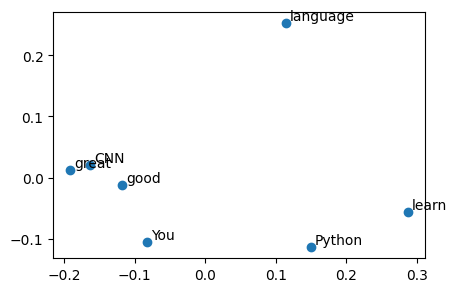

In [ ]:
from sklearn.decomposition import PCA
plt.figure(figsize=(4.8, 3.2))

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.scatter(result[:, 0], result[:, 1])   # พล็อต scatter ของ projection

for i, label in enumerate(labels):
  plt.annotate(label, xy=(result[i, 0]+.005, result[i, 1]+.005))
plt.show()

แต่ละจุดของคำคือเวกเตอร์ ระยะห่างของจุดคำ สื่อถึงความคล้าย(Similarity) ระหว่างคำ เช่น CNN, good กับ great มีค่าความคล้ายสูง ส่วน You กับ Language มีดัชนีความคล้ายต่ำ ... (อย่าลืมว่ามีผลเฉพาะ Model นี้เท่านั้น) ในกรณีที่มีคำจำนวนมาก จุดพล็อตก็จะมาก

ลองบันทึก model แล้วโหลดมาใช้งาน

In [ ]:
model.save('myword2vec.model')

In [ ]:
trained_model = Word2Vec.load('myword2vec.model')   # โหลดโมเดล
trained_model.wv.most_similar('good')     # ลองใช้

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735716819763),
 ('Python', -0.00010634276259224862),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

# (7.) สร้างระบบแนะนำสินค้า

## Load Data

ประยุกค์ใช้ Word2Vec สร้างระบบแนะนำสินค้า พิตาราณาความคล้ายพฤติกรรมลูกค้า

ข้อมูล dataset ที่นำมาใช้ คือรายการซื้อสินค้าจาก Amazon ดาวน์โหลดได้จาก [Link](https://archive.ics.uci.edu/dataset/352/online+retail) โดยไฟล์เป็นชีท Excel ดังนี้

- InvoiceNo: เลขที่ใบซื้อสินค้า (ซื้อสินค้า 1 ครั้ง คือ 1 invoice)
- StockCode: รหัสสินค้า
- Description: รายการสินค้า
- Quantitiy: ปริมาณหรือจำนวนการซื้อสินค้า
- InvoiceDate: เวลาที่ซื้อสินค้า
- UnitPrice: ราคาสินค้าต่อชิ้น
- CustomerID: รหัสลูกค้า
- Country: ประเทศของลูกค้า

ในไฟล์ข้อมูล มีจำนวน Invoice ประมาณเกือบสองหมื่นใบ ทั้งหมดมีประมาณ 5แสน record (ลูกค้าซื้อสินค้า 1 รายการ บันทึกเป็น 1 record เช่น Invoice ใบหนึ่ง มีซื้อ ปากกา 2 ด้าม ดินสอ 1 แท่ง ก็บันทึกเป็น 2 record ใน 1 Invoice หรือ 1 เสร็จ)

ขั้นตอนนี้ต้องโหลดไลบารีเพิ่มเติมคือ tqdm (สำหรับแสดง Progress bar ขณะวนรอบ Train) และ openpyxl(สำหรับเปิดไฟล์ Excel)

In [1]:
pip install tqdm

In [2]:
pip install openpyxl

import และอ่านไฟล์ข้อมูล โดยเลือกเฉพาะคอลัมน์ที่ต้องใช้งาน ตัด InvoiceDate, Country, UnitPrice เนื่องจากไม่ได้สนใจ เวลา, ประเทศ, ราคา

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec   # สำหรับ logging

cols = 'a:d, g'    # เลือกคอลัมน์ A B C D และ G
# โหลดข้อมูลจากชีท และกำหนดชนิดข้อมูลของคอลัมน์ให้เป็น String
df = pd.read_excel('/content/drive/MyDrive/deep_greenbook/datasets/Online Retail.xlsx',
                  usecols=cols, dtype={'CustomerID':str, 'InvoiceNo':str})

## ตรวจสอบข้อมูล

ตรวจสอบเบื้องต้น

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,17850
1,536365,71053,WHITE METAL LANTERN,6,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,17850


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12680
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12680
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12680
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12680
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12680


In [4]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,CustomerID
435170,574074,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,1,NaN
228669,556937,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,12,17716
266901,560273,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,4,14895
411535,572220,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,17800
415610,572549,21329,DINOSAURS WRITING SET,1,NaN
170091,551277,37447,CERAMIC CAKE DESIGN SPOTTED PLATE,4,13637
432064,573814,21169,YOU'RE CONFUSING ME METAL SIGN,3,13268
381704,569888,22697,GREEN REGENCY TEACUP AND SAUCER,24,13049
204665,554684,21164,HOME SWEET HOME METAL SIGN,3,16448
38559,539586,72232,FENG SHUI PILLAR CANDLE,48,14298


การ Sample ข้อมูล อาจพบว่ามีค่า Quantity ติดลบ กรณีนี้คือมีการคืนสินค้า แสดงว่าลูกค้าไม่สนใจซื้อ ดังนั้น กรณีนี้จะพิจารณาตัดข้อมูลนี้ทิ้งไม่นำไป Train

ลองตรวจสอบจำนวน จะพบว่ามีการคืนสินค้าสูงสุดถึงแปดหมื่นชิ้น

In [5]:
df.groupby('Quantity').size()

Quantity
-80995    1
-74215    1
-9600     2
-9360     1
-9058     1
         ..
 4800     1
 5568     1
 12540    1
 74215    1
 80995    1
Length: 722, dtype: int64

ถ้าต้องการตรวจสอบแบบระบุเงื่อนไขจำนวน เช่น ตรวจสอบลิสดูรายการที่มีการคืนเกิน 100 ชิ้น

In [6]:
df[df.Quantity < -100].sort_values('Quantity', ascending=True).head(6)

,InvoiceNo,StockCode,Description,Quantity,CustomerID
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,16446
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,12346
225530,556691,23005,printing smudges/thrown away,-9600,NaN
225529,556690,23005,printing smudges/thrown away,-9600,NaN
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,15838
225528,556687,23003,Printing smudges/thrown away,-9058,NaN


ตรวจสอบข้อมูลทั่วไป และดูมิติ จะได้ว่ามีข้อมูลห้าแสนกว่าเรคอร์ด

In [8]:
df.describe().round(2)

,Quantity
count,541909.00
mean,9.55
std,218.08
min,-80995.00
25%,1.00
50%,3.00
75%,10.00
max,80995.00


In [9]:
df.shape

(541909, 5)

ตรวจสอบว่าลูกค้าแต่ละคน (แต่ละ CustomerID) มียอดซื้อสินค้ากี่รายการ

In [10]:
df.groupby('CustomerID').count().sort_values('InvoiceNo',
                                             ascending=False).InvoiceNo.head(10)
# df.CustomerID.value_counts().sort_values(ascending=False).head(10)

CustomerID
17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
15311    2491
14646    2085
13089    1857
13263    1677
14298    1640
Name: InvoiceNo, dtype: int64

จะได้ยอดที่ค่อนข้างสูงมาก ความหมายคือ ลูกค้า CustomerID:17841 มีการซื้อจำนวน 7983 Invoice (1 Invoice คือ 1 ใบสั่ง/ใบเสร็จ) สาเหตุที่จำนวนยอดซื้อสูง อาจเป็นลูกค้าองค์กรที่ซื้อประจำหรือซื้อหลายครั้ง (ลูกค้ารายเดียวกัน แต่มีประวัติการซื้อหลาย Invoice)

เนื่องจากจำนวนสินค้าที่สูงมากนี้ อาจทำให้การแนะนำไม่ถูกต้องเท่าที่ควร ดังนั้นในที่นี้ จะแบ่งกลุ่มสินค้าตามใบ Invoice แทน คล้ายๆกับไปส่องดูว่า ตะกร้าสินค้าแต่ละใบ มีสินค้าอะไรบ้าง นั้นคือใช้วิธี 1 Invoice คือ 1 ชุดข้อมูล (ซื้อ 1 ครั้ง เอามาพิจารณาเป็นข้อมูล 1 Sample)

ตรวจสอบ Missing Data

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
CustomerID     135080
dtype: int64

จะได้ว่า Invoice ไม่มี Missing Data ส่วน CustomerID มี Missing data (เป็น NaN) แต่ก็ไม่เป็นไร เนื่องจากเราไม่ได้ใช้อ้างอิง ปล่อยไป ไม่มีผลอะไร (ใช้ Invoice เป็นหลัก)

## เตรียมข้อมูลเบื้องต้น

เมื่อเข้าใจข้อมูลแล้ว ต่อไป ทำการประมวลผลเตรียมข้อมูลเบื้องต้น (Preprocess) ลำดับแรกตัดข้อมูลที่เป็นรายการคืนสินค้าทิ้งไป (รายการที่ Quantity < 0) เริ่มจากลองตรวจสอบดูก่อน ว่ามีการคืนมากเพียงไร พบว่า มีถึง 10624

In [11]:
df[df.Quantity < 0].count()

InvoiceNo      10624
StockCode      10624
Description     9762
Quantity       10624
CustomerID      8905
dtype: int64

Quantity มีจำนวนที่ติดลบ หรือคืนสินค้าทิ้งไป 10624

In [12]:
df.shape

(541909, 5)

ลองตัดรายการที่คืนสินค้าออกไป

In [13]:
df = df[df.Quantity > 0]    # ตัดรายการคืนสินค้าออกไป เอาเฉพาะแต่ที่ซื้อ
df.shape

(531285, 5)

จาก 541909 เรคอร์ด เหลือเพียง 531285 เรคอร์ด

ตรวจสอบด้วยคำสั่งการคืนสินค้าแบบเดิมอีกรอบ จะพบว่าไม่มีรายการคืนสินค้าแล้ว

In [14]:
df[df.Quantity < 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
CustomerID     0
dtype: int64

เปลี่ยนข้อมูลให้เป็น String เนื่องจากบางคอลัมน์มีข้อมูลเป็นตัวเลขล้วน จะต้องเปลี่ยนให้เป็น String เพื่อใช้กับ Word2Vec เช่น StockCode (รหัสสินค้า) ใน workshop นี้ใช้ StockCode เป็นเหมือนกับ word คำหนึ่ง ดังนั้นต้องเปลี่ยน StockCode จาก 22904 --> "22904"

In [15]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

Invoice ที่มีการซื้อเพียง 1 รายการ จะไม่สร้างความเชื่อมโยงกับสินค้าอื่น (เหมือนกับประโยคที่มีคำอยู่ 1 คำเท่านั้น ไม่ได้สร้างความเชื่อมโยงใดๆ) ลองตรวจสอบดังนี้

In [16]:
df_invo1 = df.groupby('InvoiceNo').count().Quantity.sort_values()
df_invo1

InvoiceNo
A563187       1
561392        1
561386        1
542145        1
561372        1
           ... 
558475      705
580729      721
581492      731
581219      749
573585     1114
Name: Quantity, Length: 20728, dtype: int64

จะพบว่ามี Invoice หลายใบที่มีการซื้อสินค้าเพียงรายการเดียว ให้ทำการตัดทิ้งไป

In [17]:
frame = {'InvoiceNo': df_invo1.index, 'Count': df_invo1.values}

res = pd.DataFrame(frame)
invoices_small = res[res.Count <= 1].InvoiceNo.tolist()
invoices_small[:10]

['A563187',
 '561392',
 '561386',
 '542145',
 '561372',
 '561368',
 '561365',
 '561361',
 '561333',
 '561327']

จะได้ข้อมูล List ของ Invoice ที่ซื้อ 1 ชิ้น (ตัวแปร invoices_small) ต่อไปทำการตัดออกจากข้อมูลหลัก df โดยวิธีเทียบทีละ Invoice ถ้า Invoice ใด อยู่ใน invoice_small (ซื้อสินค้าเพียงรายการเดียว) ให้ตัดออกจากข้อมูลหลัก df (พูดง่ายๆ คือเอารายการ List ที่มีอยู่ใน invoice_small ไปตัดออกจากข้อมูลหลัก df)

In [18]:
df = df[df.InvoiceNo.apply(lambda x: x not in invoices_small)]    # ตัดออก ใช้เวลาสักครู่

In [19]:
df.shape    # ก่อนหน้านี้มี 531285

(528911, 5)

จะพบว่าเหลือ Invoice ที่มี 2 รายการขึ้นไปเท่านั้น

In [20]:
df.groupby('InvoiceNo').size().sort_values()

InvoiceNo
563208       2
565206       2
565205       2
542889       2
554952       2
          ... 
558475     705
580729     721
581492     731
581219     749
573585    1114
Length: 18354, dtype: int64

## เตรียม Dataset

เตรียม Dataset เพื่อ Train จากที่กล่าวแล้วว่า จะอ้างอิงการซื้อสินค้าโดยใช้รายการสินค้าใน InvoiceNo เป็นหลัก ดังนั้นให้สร้างข้อมูลเก็บรายการ InvoiceNo ขึ้นมา โดยใช้ InvoiceNo เปลี่ยนเป็น List แบบ Unique (ข้อมูลที่ซ้ำกัน)

In [21]:
customers = df.InvoiceNo.unique().tolist()
print(len(customers))   # จำนวนใบ InvoiceNo
customers[:6]

18354


['536365', '536366', '536367', '536368', '536370', '536372']

คือ ['เลขinvoice1', 'เลขinvoice2', ...]

ทำการแบ่งข้อมูลเป็น 2 ส่วน (สามารถข้ามขั้นตอนนี้ไปได้ ถ้าใช้สำหรับ Train อย่างเดียว ไม่ได้นำไปใช้ Validate)

In [22]:
# กรณีต้องการสลับตำแหน่ง (Shuffle) customer ให้เปิดใช้ 2 บรรทัดต่อไปนี้
import random
random.shuffle(customers)

customers_train = [customers[i] for i in range(round(0.9*len(customers)))]    # 90%

#   แบ่ง data train และ validation set
train_df = df[df['InvoiceNo'].isin(customers_train)]    # train_df

# validation คือส่วนที่ไม่อยู่ใน customers_train
validation_df = df[~df['InvoiceNo'].isin(customers_train)]

In [23]:
train_df.shape, validation_df.shape

((471711, 5), (57200, 5))

ทำการสร้างข้อมูลให้มีโครงสร้างคล้ายประโยค 'Sentence' เพื่อใช้กับ Word2Vec ในที่นี้ใช้ tqdm เพื่อแสดง % Progress bar เนื่องจากการทำงานจะใช้เวลาพอสมควร

In [24]:
purchases_train = []

# for i in customers_train    # ถ้าไม่ใช้ tqdm
for i in tqdm(customers_train):
  temp = train_df[train_df.InvoiceNo == i]["StockCode"].tolist()
  purchases_train.append(temp)

100%|██████████| 16519/16519 [15:25<00:00, 17.85it/s]


In [25]:
purchases_train[:3]

[['23298',
  '22722',
  '23054',
  '23053',
  '23052',
  '48188',
  '21524',
  '48187',
  '21754',
  '21668',
  '21671',
  '21673',
  '21670',
  '21672',
  '21669',
  '23082',
  '23107',
  '23108',
  '23166',
  '23165',
  '23300',
  '23301',
  '22469',
  '22470',
  '84879',
  '84569D',
  '84569A',
  '22925'],
 ['22086',
  '21918',
  '47343A',
  '22142',
  '21098',
  '22352',
  '22865',
  '22632',
  '22144',
  '22964',
  '22910',
  '22966',
  '84380',
  '21479',
  '22694',
  '22968',
  '22075',
  '85049F',
  '85049C',
  '72802A',
  '22748',
  '22745',
  '20967',
  '21499',
  '21623',
  '22746',
  '20749',
  '20750',
  '22617',
  '22505',
  '84558A',
  '84581',
  '84580',
  '21481',
  '22837',
  '22634',
  '21928',
  '22411'],
 ['84879',
  '40001',
  '22178',
  '84947',
  '79051A',
  '23091',
  '23315',
  '23123',
  '21207',
  '23018',
  '23019']]

จะได้ List รายการสินค้า (StockCode) ในแต่ละ Invoice (ผลลัพธ์ที่ได้จะไม่เหมือนกับในหนังสือ เพราะทำการ random ไว้ก่อนหน้านี้แล้ว) เช่น ใบ Invoice แรก ซื้อสินค้า 4 รายการ คือ '22960', '22913', '22912', '22914'

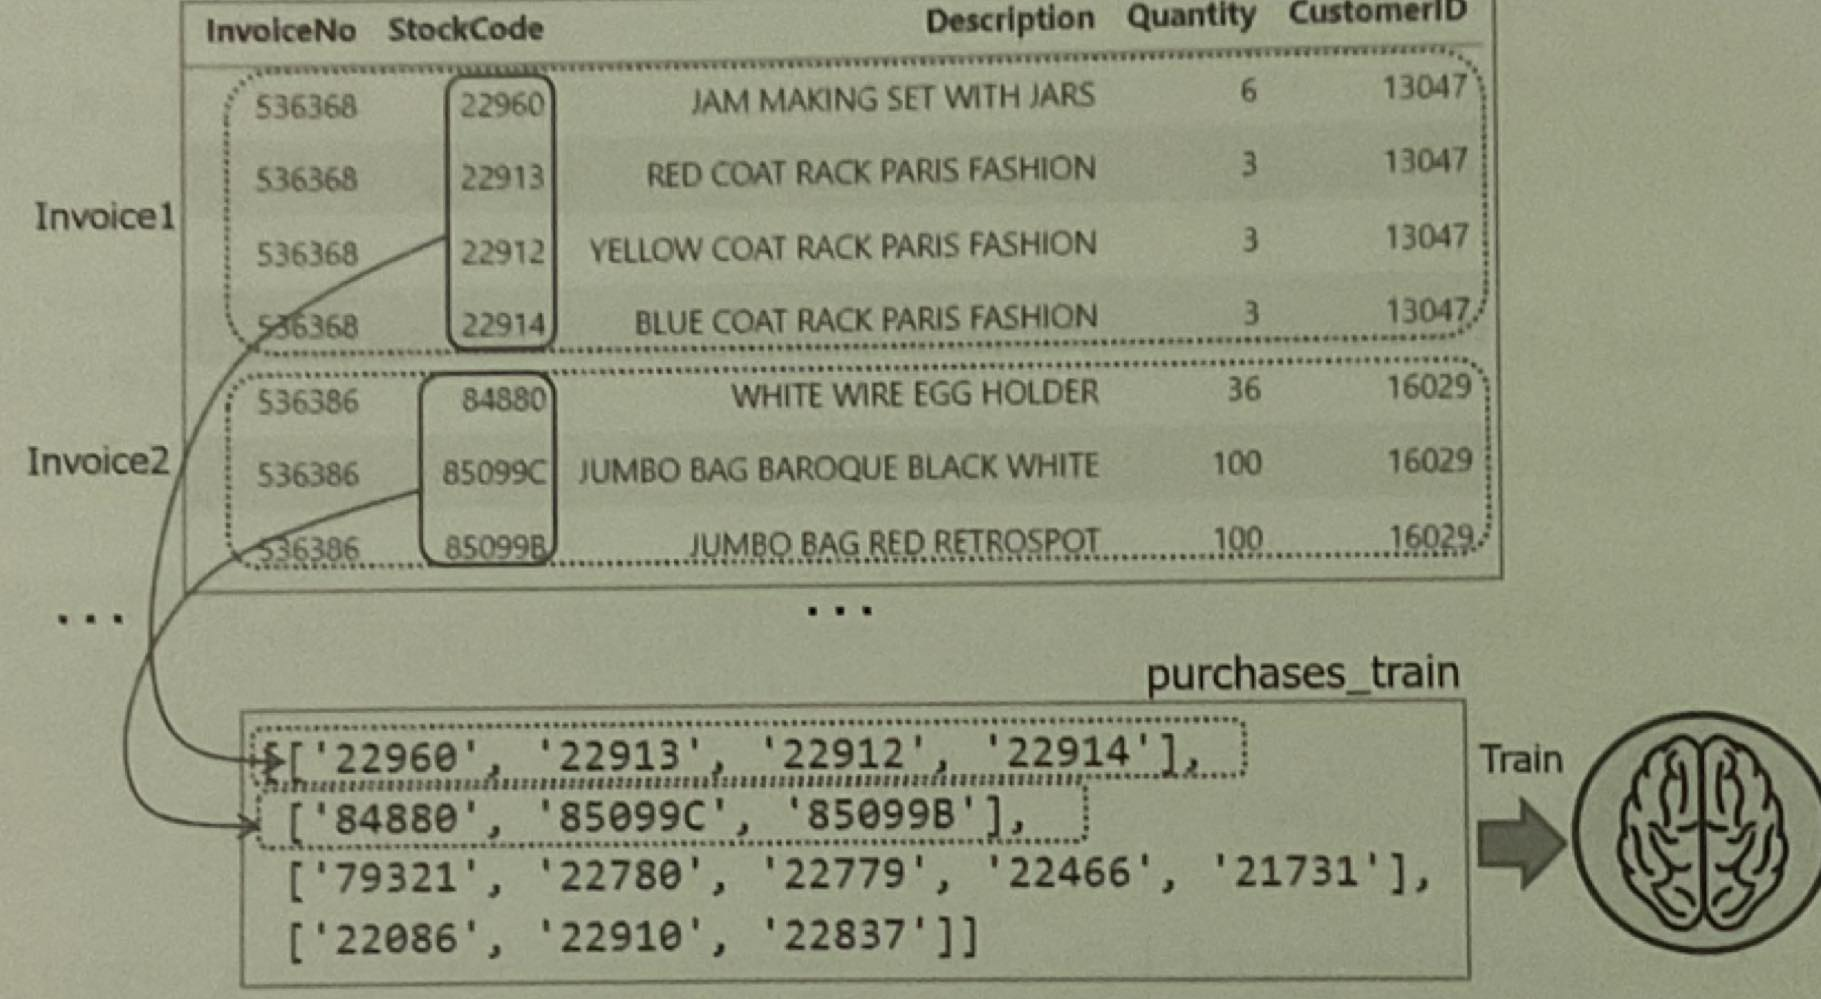

สรุปง่ายๆ คือ ในแต่ละ Invoice (แต่ละ Transaction) ลูกค้าซื้อสินค้าอะไรบ้าง นำเอาเฉพาะ รหัสสินค้ามาทำเป็น List เทียบได้กับการสร้างลิสคำหรือ Token ของประโยค เช่น มี 3 เอกสาร แต่ละเอกสาร หลังจากตัดคำสร้าง List แล้วจะได้ List ซ้อน List ดังนี้

```
[['CNN', 'is', 'good'],     # เอกสาร 1
 ['python', 'is', 'easy', 'and', 'good'],     # เอกสาร 2
 ['So', 'good', 'so', 'happy', 'enjoy', 'with', 'Python']]
```



## Train

เมื่อข้อมูลพร้อมแล้วเริ่มทำการ Train เนื่องจากถ้า Dataset มีขนาดใหญ่หรือจำนวน Epoch มาก การ Train จะใช้เวลานาน การทำงานจะดูเหมือนเงียบนิ่งๆไป จนอาจดูไม่รู้ว่าเครื่องแฮงค์หรือไม่ ดังนั้น เพื่อให้มีการรายงานคืบหน้า ะใช้วิธีสร้างส่วนมอนิเตอร์ Callback รายงานแต่ละแบบ

โค้ดการ Train จริงๆ จะมีเพียง model = ... เท่านั้น ในที่นี้ตั้งค่าให้ sg=1 คือ Train แบบ Skip-gram (อินพุตคือรหัสสินค้าที่กำลังพิจารณา ส่วน Target คือ รหัสสินค้าอื่นๆที่อยู่ในตะกร้า ประมาณ แอบส่องว่าใกล้กันมีสินค้าอื่นๆอะไรบ้าง) มีขนาดเวกเตอร์=50 และขนาด Window size=5

In [26]:
from IPython.display import clear_output

# คลาสสำหรับการมอนิเตอร์แต่ละ Epoch (Callback)
class MonitorCallback(CallbackAny2Vec):
  def __init__(self):
    self.epoch = 0
    clear_output(wait=True)
    print("Start ...")

  def on_epoch_begin(self, model):
    print("Epoch start")

  def on_epoch_end(self, model):
    clear_output(wait=True)
    print('Epoch #{}/{}'.format(self.epoch+1, model.epochs))    # แสดงรอบ
    self.epoch += 1

monitor = MonitorCallback()   # monitor

# ทำการ Train
model = Word2Vec(purchases_train, vector_size=50, window=5,
                 sg=1, workers = 4, epochs=40, callbacks=[monitor])

Epoch #40/40


ตรวจสอบ Model

In [27]:
print(model)

Word2Vec<vocab=3419, vector_size=50, alpha=0.025>


vocab คือ จำนวนรหัสสินค้า (StockCode) เนื่องจากใช้รหัสสินค้าเป็น คำ หรือ vocab ในการ Train

ต่อไปลองตรวจดูว่าใน model มีรหัสสินค้าเป็นอะไรบ้าง (เทียบได้กับการตรวจสอบว่า Word2Veec Model มีคำศัพท์อะไรบ้าง)

In [28]:
model.wv.index_to_key[:6]

['85123A', '85099B', '22423', '47566', '20725', '84879']

ตรวจสอบเวกเตอร์ของสินค้า

In [29]:
model.wv['22423']

array([ 0.12738405,  0.07511513,  0.19117461, -0.1058071 , -0.08998494,
       -0.4289663 ,  0.13824733,  0.00630981, -0.11813986, -0.6632418 ,
        0.20137903, -0.7039903 ,  0.13488297,  0.29247323, -0.35351864,
        0.8075031 , -0.06178726, -0.12095401, -0.5454677 ,  0.16659488,
       -0.08358391,  0.16036932,  0.2865418 , -0.04092193,  0.32474735,
        0.01093143, -0.14498185, -0.35990655, -0.38565254, -0.03988764,
       -0.10297307, -0.03691286,  0.1662899 , -0.22135296,  0.02104241,
        0.11567694,  0.14321646,  0.22280216,  0.16222423, -0.07492941,
        0.10399102, -0.50976694, -0.37491027,  0.24180633,  0.41294977,
        0.33573094,  0.15482043,  0.00474454,  0.24040872,  0.44558266],
      dtype=float32)

ได้ค่าเวกเตอร์ขนาด 50 ของสินค้า '22423'

เก็บ model ไว้ใช้งาน

In [30]:
model.save("amazon_store.model")

## ใช้งานแนะนำสินค้า

หลัง Train แล้ว สินค้าแต่ละตัว จะมีค่าเวกเตอร์ของตัวเองที่ไม่เหมือนกัน (Word Embedding) โดยมีคุณสมบัติในเชิงเวกเตอร์ คล้ายกับคำศัพท์ของ Word2Vec ที่กล่าวมาแล้ว คือ คำที่มีความหมายใกล้เคียงกัน ค่าความคล้าย(Similarity)จะสูง ในที่นี้ก็เช่นกัน สินค้าที่คล้ายกัน ค่าความคล้ายจะสูง (ระบบเรียนรู้จากการ Train)

ดังนั้น วิธีการแนะนำสินค้าคือ หาค่าความคล้ายของรหัสสินค้า (StockCode) นั่นเอง (ให้คิดว่ารหัสสินค้าคือ คำๆหนึ่งในระบบ Word2Vec) เช่น ลองหาว่ามีสินค้าอะไรบ้างที่คล้ายกับสินค้ารหัส '22613' (ต้องอ้างอิงด้วยรหัสสินค้า เนื่องจากการ Train ได้ใช้รหัสสินค้าเป็นหลัก เหมือนกับเป็น 1 word)

In [32]:
model.wv.most_similar('22613', topn=5)    # สินค้า Napkins

[('22614', 0.6786479353904724),
 ('21080', 0.6603698134422302),
 ('22629', 0.6575897932052612),
 ('22631', 0.6336359977722168),
 ('22630', 0.6301427483558655)]

จะได้รายการสินค้าที่มีค่าความคล้ายสูงสุดตามลำดับ แต่เนื่องจากจะดูไม่ออกว่าสินค้าชื่ออะไร ดังนั้น ให้สร้างดิกชันนารีที่มี key-value เป็น StockCode: Description

In [33]:
products = train_df[["StockCode", "Description"]]   # DataFrame

# ลบส่วนที่ซ้ำ (Remove duplicates)
products.drop_duplicates(inplace=True, subset='StockCode', keep='last')
products[:5]

<ipython-input-33-79e5f46230d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.drop_duplicates(inplace=True, subset='StockCode', keep='last')


,StockCode,Description
107,84854,GIRLY PINK TOOL SET
336,20820,SILVER LOOKING MIRROR
2313,82615,PINK MARSHMALLOW SCARF KNITTING KIT
2587,21777,RECIPE BOX WITH METAL HEART
4116,35271S,GOLD PRINT PAPER BAG


สร้าง StockCode: Description และทดสอบการค้นหาชื่อจากรหัสสินค้า

In [34]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()
products_dict['22613']    # สินค้ารหัสนี้ คือ Napkins

['PACK OF 20 SPACEBOY NAPKINS']

สมมุติว่าลูกค้ากำลังชมสินค้ารหัส '15044C' อยู่ ระบบจะนำรหัสสินค้าดังกล่าว ไปเข้า model หาว่าสินค้าตัวใดมีค่าความคล้ายมากที่สุด (หรือมีความสัมพันธ์กันมากที่สุด) จากนั้นก็จะแนะนำ

In [35]:
sku_now = '15044C'    # parasol ร่มกันแดด
similars = model.wv.most_similar(sku_now, topn=7)  # หาค่าความคล้าย

print('Shopping:', sku_now, products_dict[sku_now][0])
print("-" * 80)

for i in similars:    # แนะนำ
  if i[1] > 0.6:
    print('{:6} {:36} {:.3f}'.format(i[0], products_dict[i[0]][0], i[1]))

Shopping: 15044C PURPLE PAPER PARASOL
--------------------------------------------------------------------------------
15044A PINK PAPER PARASOL                   0.834
15044B BLUE PAPER PARASOL                   0.822
15044D RED PAPER PARASOL                    0.774
15036  ASSORTED COLOURS SILK FAN            0.746
15039  SANDALWOOD FAN                       0.693
17012B ORIGAMI JASMINE INCENSE/CANDLE SET   0.693
15034  PAPER POCKET TRAVELING FAN           0.658


ลองนำรายการที่ได้จากการแนะนำไปค้นใน Google เช่น 'PINK PAPER PARASOL + amazon.co.uk' จะเห็นว่าลูกค้ากำลังเปิดดูร่มกันแดดสไตล์เอเชียอยู่ โดยรวมถือว่าสินค้าที่ระบบแนะนำมีความสอดคล้องหรือเข้าพวกกันพอสมควร

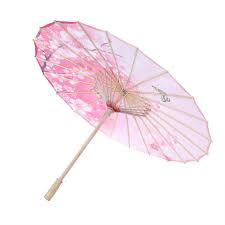

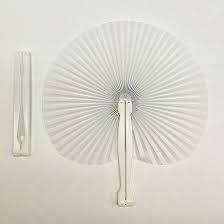

เกี่ยวกับการแนะนำสินค้า ร้านค้าจริงอาจแนะนำสินค้า โดยพิจารณาถึงการใช้งานร่มกัน เช่น ถ้าเราซื่อท่อ PVC กับข้อต่อ คนขายก็จะถามว่า เอากาวไหม ฯลฯ

รายการที่แนะนำ จะเหมาะสมมากน้อย ขึ้นอยู่กับความสัมพันธ์ของ dataset

## Visual Plot

สินค้าแต่ละรายการ มีค่าเป็นเวกเตอร์ที่แตกต่างกัน สามารถพล็อตดูจุดสินค้าเพื่อดูความสัมพันธ์จากระยะห่างจุดข้อมูลได้

เริ่มจากนำรหัสสินค้ามาเก็บไว้ใน List Labels เพื่อใช้สำหรับเขียนรหัสสินค้ากำกับจุดข้อมูล

In [36]:
labels = np.asarray(model.wv.index_to_key)    # รหัสสินค้า (StockCode)
labels.shape

(3419,)

In [37]:
labels[:10]

array(['85123A', '85099B', '22423', '47566', '20725', '84879', '22197',
       '22720', '21212', '22383'], dtype='<U12')

นำเวกเตอร์ของสินค้าทั้งหมดมาเก็บใน vectors เพื่อเตรียมพล็อต

In [38]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(3419, 50)

ได้เวกเตอร์จำนวน 34141 รายการ ขนาด 50 แสดงว่าต้องใช้ถึง 50 แกนในการพล็อต จึงต้องแปลงให้เป็น 2 มิติ เพื่อพล็อตลงกราฟ 2 แกน x, y (PCA ของ scikit-learn)

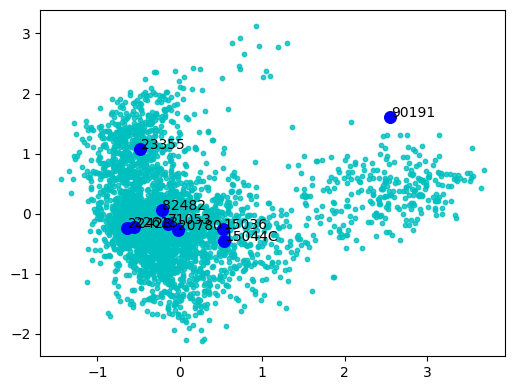

In [41]:
# label กำกับจุดข้อมูล
lst_chk = ['22613','22423','20780','23355','71053',
           '90191','82482','15036','15044C']    # ต้องการดูว่าจุดเวกเตอร์สินค้ากระจายอยู่ตรงไหนบ้าง

from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # ใช้ PCA แปลงให้เป็นเวกเตอร์ 2 มิติ
result = pca.fit_transform(vectors)
plt.figure(figsize=(6, 4.5))
plt.scatter(result[:, 0], result[:, 1], s=10, alpha=.8, c='c')   # Scatter plot

# พล็อตจุดและข้อความเวกเตอร์ เฉพาะสินค้าที่สนใจ (ในตัวแปร lst_chk เท่านั้น)
for i, label in enumerate(labels):
  if label in lst_chk:
    plt.scatter(result[i][0], result[i][1], s=70, c='b')
    plt.annotate(label, xy=(result[i, 0]+.005, result[i, 1]+.005))

plt.show()

สังเกตว่าสินค้า 90191 (สร้อยคอสตรี) จะค่อนข้างอยู่ห่างจากกลุ่มสินค้าเด็ก 22631 แสดงว่า Model สร้างความสัมพันธ์ของสินค้าได้ดีในระดับหนึ่ง

สรุป Workshop นี้แสดงการประยุกค์ใช้ Word2Vec แบบ Skip-gram สร้าง Model ระบบแนะนำสินค้า โดยทั้งหมดจะเห็นว่า ไม่ได้นำข้อมูลสินค้าพวก Description มาใช้เป็น dataset เลย (ไม่ได้เอาไป Train) แต่ใช้เฉพาะรหัสสินค้า (StockCode) เท่านั้น การที่ model เรียนรู้แล้วสร้างความสัมพันธ์เชิงเวกเตอร์ได้ ก็อาศัย Skip-gram คล้ายกับการแอบส่องดูตะกร้าหรือใบซื้อสินค้า (Invoice) ว่าคนอื่นซื้ออะไรบ้าง ซึ่งได้ผลลัพธ์ที่ดีพอสมควร

เปรียบเทียบระหว่างวิธีนี้กับการนำข้อมูล ชื่อ รายละเอียด Description คุณลักษณะของสินค้ามาสร้าง Model (Content-based Filtering System)
- Word2Vec เรียนรู้พฤติกรรมของผู้ซื้อ ซึ่งไม่เกี่ยวกับชื่อหรือรายละเอียดสินค้า ดังนั้นจะมีความเป็น Dynamic คือ ถ้าผู้ซื้อเปลี่ยนความนิยมซื้อสินค้า Model ก็จะเรียนรู้พฤติกรรมนั้น ส่วนข้อเสียคือ จะต้องมีข้อมูล Transaction การซื้อสินค้าที่เกิดขึ้นแล้วมากพอสมควร จึงจะสามารถสร้าง Model ได้ดี
- การสร้าง Model จากข้อมูลรายละเอียดสินค้า (Content-based Filtering System) มีข้อดีคือ สร้าง Model ได้จากข้อมู,รายละเอียดสินค้าได้เลย โดยไม่ต้องรอให้มีการ Tramsaction ของการซื้อสินค้าเกิดขึ้น แต่ข้อเสียคือ ไม่ได้สะท้อนพฤติกรรมผู้ซื้อ ทำให้ตัว model ยึดตายตัวกับข้อมูลรายละเอียดสินค้าและอัลกอริทึมที่ใช้